# Quick fastai v2 baseline

this pipeline is to get you started with a quick baseline in fastai. Would love comments on improving it.

Check out fastbook chapter 5 (and 4 and 2) for more info on cnn_learner.
https://github.com/fastai/fastbook

In [1]:
# starter cell lets run it, cause why not.

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
# kaggle already is already updated to fastai v2

import fastai
from fastai.vision.all import *

In [3]:
Config.config_path


Path('/root/.fastai')

for those starting out (like me) you can look at the data by tappping the |< icon on the top right. You can also copy path directly from there.

In [4]:
input_images = "../input/cassava-leaf-disease-classification"


In [5]:
!dir {input_images}

label_num_to_disease_map.json  test_images     train.csv     train_tfrecords
sample_submission.csv	       test_tfrecords  train_images


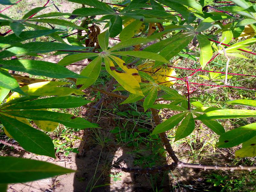

In [6]:
# lets look at an image
# you can do it manually too

im = Image.open(input_images + "/train_images/1000015157.jpg")
im.to_thumb(256,256)

# nice pic !

In [34]:
TRAIN = input_images + "/train_images"
TEST = input_images + "/test_images"
LABELS = input_images + "/train.csv"
SAMPLE_SUB = input_images + "/sample_submission.csv"

# I really like it when the data input is uncomplicated as this
# it really makes it accessible!
# but i dont understand the tf records part
# would be happy if someone clarified

In [8]:
# reading the training csv

train_df = pd.read_csv(LABELS)
train_df.head()



,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [9]:
#print(train_df.__dict__)

{'_is_copy': None, '_mgr': BlockManager
Items: Index(['image_id', 'label'], dtype='object')
Axis 1: RangeIndex(start=0, stop=21397, step=1)
IntBlock: slice(1, 2, 1), 1 x 21397, dtype: int64
ObjectBlock: slice(0, 1, 1), 1 x 21397, dtype: object, '_item_cache': {}, '_attrs': {}}


In [10]:
# very helpful Dataloader from fastai
# further transformation can be looked into
# checkout chapter 5 of fastbook for reference

dls = ImageDataLoaders.from_df(train_df, TRAIN, item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))

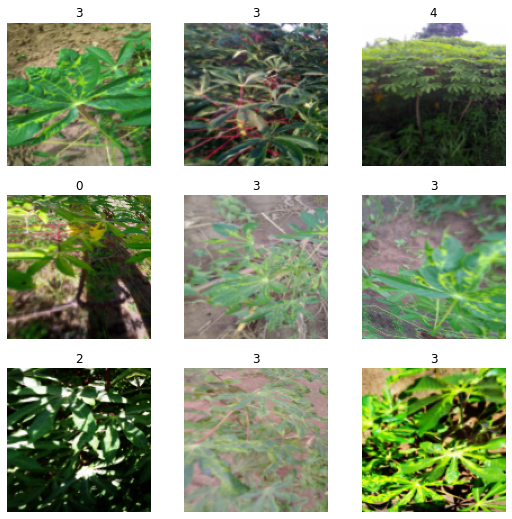

In [14]:
dls.show_batch()

In [15]:
fns = get_image_files(TEST)

In [13]:
#verify_images(fns)
#just in case

# you can use it if you are using dirty test images

(#0) []

In [17]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
#learn = cnn_learner(dls, resnet50, metrics=error_rate)

learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.312395,0.951163,0.330685,03:42


epoch,train_loss,valid_loss,error_rate,time
0,0.899795,0.780187,0.281842,03:36


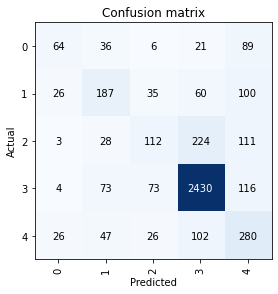

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# lots a error here try 
# try using resnet50

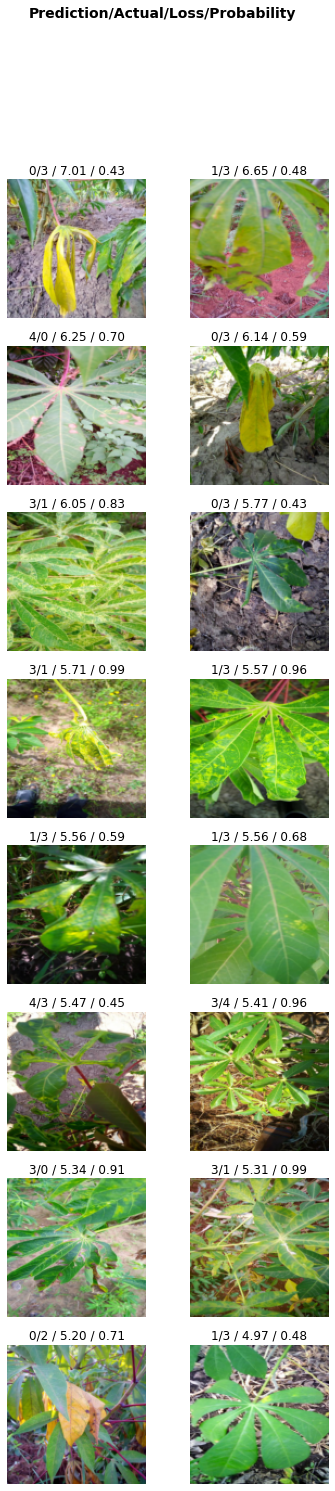

In [21]:
interp.plot_top_losses(16,nrows=8)

In [27]:
learn.export(fname='/kaggle/working/export.pkl')


# this can be a chekpoint if you are running this notebook
# we can load the model next time we come back

In [28]:
# load the pickle file you exported previously
path = Path()
path.ls(file_exts='.pkl')

learn_inf = load_learner(path/'export.pkl')

In [30]:
# submitting on test data

!dir {TEST}

# hmm why is there just one test image here
# sure looks fishy I guess real data is in tfrecords
# need to come back and parse it

2216849948.jpg


In [32]:
# anyway
# lets make the submission

learn_inf.predict("../input/cassava-leaf-disease-classification/test_images/2216849948.jpg")

('3', tensor(3), tensor([0.0179, 0.0239, 0.3347, 0.3625, 0.2610]))

In [35]:
# so lets submit

submissions = pd.read_csv(SAMPLE_SUB)
submissions.head()

# label is not 4 its 3
# so lets change it

,image_id,label
0,2216849948.jpg,4


In [47]:
id_list = list(submissions.image_id)
print(id_list)

submissions.iloc[0].label = 3

submissions.head()

['2216849948.jpg']


,image_id,label
0,2216849948.jpg,3


In [49]:
submissions.to_csv('submission.csv')

This is the end of quick baseline model.

however you (yes you!) can improve it.

1. firstof all instead of using resnet18 you can change it to resnet 50 and train it. that will definitely bump the accuracy.

1. and how to parse these tfrecords. somebody got any idea ?

2. check out chapter 5 of fastbook to look into various augmentations you can try with this dataset.

